<a href="https://colab.research.google.com/github/TienLungSun/PyTorch-deep-learning/blob/main/2.1.%20MLP%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np

In [2]:
if(torch.cuda.is_available()):
    device = torch.device("cuda")
    print(device, torch.cuda.get_device_name(0))
else:
    device= torch.device("cpu")
    print(device)

cuda Tesla K80


#Generate data

In [3]:
lstX=[]
lstY=[]
for i in range(2000):
  x1 = np.random.normal(0.5, 0.3) # mean and standard deviation
  x2 = np.random.normal(0, 0.3)
  x3 = np.random.normal(0.8, 0.5)
  x4 = np.random.normal(0.3, 0.8)
  x5 = np.random.normal(0.6, 0.5)
  x6 = np.random.normal(0.5, 0.3)
  x7 = np.random.normal(0, 0.6)
  # y = 323*x1^2 + 586*x1x2 + 40*x3 + 8972x5^3 + 267*x3^2x5x6 + 78*x7^2
  y = 323*pow(x1,2)+586*x1*x2+40*x3+8972*pow(x5,3)+267*pow(x3,2)*x5*x6+78*pow(x7,2)
  lstX.append([x1, x2, x3, x4, x5, x6, x7])
  lstY.append([y])

In [4]:
#convert data to numpy array
numpyX = np.array(lstX)
numpyY = np.array(lstY)
print(numpyX.shape, numpyY.shape)

(2000, 7) (2000, 1)


#Split input data to train and test data

In [5]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(numpyX, numpyY, test_size=0.20, random_state=0)
print(trainX.shape, testX.shape, trainY.shape, testY.shape)

(1600, 7) (400, 7) (1600, 1) (400, 1)


# Build NN

In [6]:
import torch.nn as nn

In [7]:
MyNet = nn.Sequential(
    nn.Linear(7, 56),
    nn.ReLU(),
    nn.Linear(56, 56),
    nn.ReLU(),
    nn.Linear(56, 1),
)
MyNet.to(device)
print(MyNet)

Sequential(
  (0): Linear(in_features=7, out_features=56, bias=True)
  (1): ReLU()
  (2): Linear(in_features=56, out_features=56, bias=True)
  (3): ReLU()
  (4): Linear(in_features=56, out_features=1, bias=True)
)


In [8]:
loss_func = torch.nn.MSELoss()

In [9]:
optimizer = torch.optim.Adam(MyNet.parameters(), lr=0.0005)

# Generate mini-batches of training data

In [10]:
import torch.utils.data as Data

In [11]:
#convert data format from numpy array to tensor
tensorX = torch.FloatTensor(trainX).to(device)
tensorY = torch.FloatTensor(trainY).to(device)

In [12]:
torch_dataset = Data.TensorDataset(tensorX, tensorY)

In [13]:
loader = Data.DataLoader(
    dataset=torch_dataset,  
    batch_size=200,      
    shuffle=True,       
    num_workers=0,    # subprocesses for loading data
)

In [14]:
for (batchX, batchY) in loader:
    break
print(batchX.shape, batchY.shape)

torch.Size([200, 7]) torch.Size([200, 1])


# train one step

In [15]:
batchY_hat  = MyNet(batchX)
loss = loss_func(batchY , batchY_hat)
print(float(loss))
optimizer.zero_grad()
loss.backward()
optimizer.step()

205611760.0


# Training Loop

In [16]:
lossLst = []
for epoch in range(1, 2000):
  if(epoch%100 == 0):
      print(epoch, end=",")
  for (batchX, batchY) in loader:
    batchY_hat = MyNet(batchX)
    loss = loss_func(batchY_hat, batchY)
    lossLst.append(float(loss))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,

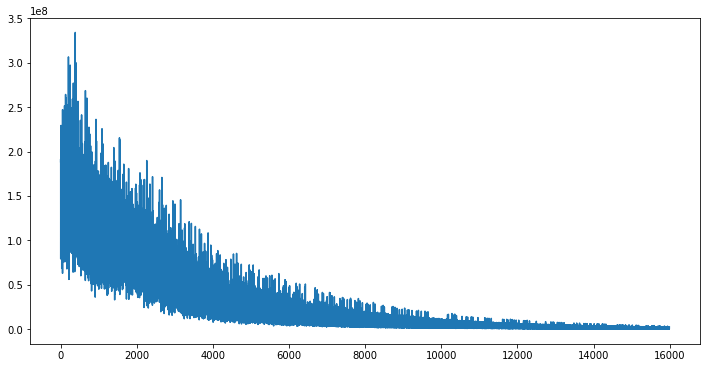

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(lossLst)
plt.show()

# Test to check generalized prediction performance

In [18]:
tensorX = torch.FloatTensor(testX).to(device)
tensorY = torch.FloatTensor(testY).to(device)
tensorY_hat = MyNet(tensorX)
loss = loss_func(tensorY, tensorY_hat)
print("%.2f" % (float(loss)), end = ", ")

458858.91, 

# Run training-test N times to collect performance data

In [19]:
test_lossLst = []
for i in range(1, 21):
  print("\nTrain-test ", i, end= " ")
  trainX, testX, trainY, testY = train_test_split(numpyX, numpyY, test_size=0.20, random_state=0)
  torch_dataset = Data.TensorDataset(tensorX, tensorY)
  loader = Data.DataLoader(
      dataset=torch_dataset,  
      batch_size=200,      
      shuffle=True,       
      num_workers=0,    # subprocesses for loading data
  )

  # initialize NN weights
  for name, param in MyNet.named_parameters():
    if(param.requires_grad):
      torch.nn.init.normal_(param, mean=0.0, std=0.02)

  # train NN 
  print("epoch", end=": ")
  for epoch in range(1, 2000):
    if(epoch%200 == 0):
      print(epoch, end=",")
    for (batchX, batchY) in loader:
      batchY_hat = MyNet(batchX)
      loss = loss_func(batchY_hat, batchY)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

  tensorX = torch.FloatTensor(testX).to(device)
  tensorY = torch.FloatTensor(testY).to(device)
  tensorY_hat = MyNet(tensorX)
  loss = loss_func(tensorY, tensorY_hat)
  test_lossLst.append(float(loss))


Train-test  1 epoch: 200,400,600,800,1000,1200,1400,1600,1800,
Train-test  2 epoch: 200,400,600,800,1000,1200,1400,1600,1800,
Train-test  3 epoch: 200,400,600,800,1000,1200,1400,1600,1800,
Train-test  4 epoch: 200,400,600,800,1000,1200,1400,1600,1800,
Train-test  5 epoch: 200,400,600,800,1000,1200,1400,1600,1800,
Train-test  6 epoch: 200,400,600,800,1000,1200,1400,1600,1800,
Train-test  7 epoch: 200,400,600,800,1000,1200,1400,1600,1800,
Train-test  8 epoch: 200,400,600,800,1000,1200,1400,1600,1800,
Train-test  9 epoch: 200,400,600,800,1000,1200,1400,1600,1800,
Train-test  10 epoch: 200,400,600,800,1000,1200,1400,1600,1800,
Train-test  11 epoch: 200,400,600,800,1000,1200,1400,1600,1800,
Train-test  12 epoch: 200,400,600,800,1000,1200,1400,1600,1800,
Train-test  13 epoch: 200,400,600,800,1000,1200,1400,1600,1800,
Train-test  14 epoch: 200,400,600,800,1000,1200,1400,1600,1800,
Train-test  15 epoch: 200,400,600,800,1000,1200,1400,1600,1800,
Train-test  16 epoch: 200,400,600,800,1000,1200,

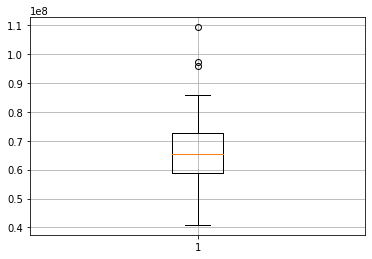

In [20]:
#take a look at the performance
plt.boxplot(test_lossLst)
plt.grid()

#Read data from excel file

# prepare an excel data file
x1 =NORMINV(RAND(), 0.5, 0.3)<br>
x2 =NORMINV(RAND(), 0, 0.3)<br>
x3 =NORMINV(RAND(), 0.8, 0.5) <br>
...<br>
y = 323*x1^2 + 586*x1x2 + 40*x3 + 8972x5^3 + 267*x3^2x5x6 + 78*x7^2

In [41]:
from google.colab import files
uploaded = files.upload()

Saving aaa.xlsx to aaa.xlsx


In [42]:
fnameLst = list(uploaded.keys())
fname = fnameLst[0]
print(fname)

aaa.xlsx


In [43]:
import pandas as pd
df=pd.read_excel(fname)

In [44]:
df.head(5)

,y,x1,x2,x3
0,3.527753,0.400110,0.793179,-0.052116
1,0.259218,0.530419,-0.403757,-0.120768
2,2.617957,0.694584,-0.032514,0.631748
3,3.137631,0.327067,0.290861,1.283847
4,2.753022,0.489963,-0.081297,1.527023


In [45]:
df.columns

Index(['y', 'x1', 'x2', 'x3'], dtype='object')

In [46]:
dfX = df[['x1', 'x2', 'x3']]
dfY = df[['y']]

In [47]:
numpyX = np.array(dfX.values)
numpyY = np.array(dfY.values)

In [48]:
print(numpyX.shape, numpyY.shape)

(19, 3) (19, 1)
